In [185]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.patches as mpatches


For a one feature dataset, I have taken a 2D curve following the function f(x)=cos(x)+sin(x/2)

In [119]:
def fun_y(x):
    return math.cos(x)+math.sin(x/2)

In [141]:
trainx=np.arange(1,20,dtype='int64')
testx=np.arange(20,25,dtype='int64')
trainy=[fun_y(val) for val in trainx]
testy=[fun_y(val) for val in testx]

In [142]:
print(trainy)
print(testy)

[1.0197278444723428, 0.4253241482607541, 0.00750249000360903, 0.25565380596206977, 0.8821343295671829, 1.1012902947102332, 0.40311902665368476, -0.9023025291165417, -1.888660379549774, -1.797995803739591, -0.7011146275823411, 0.5644384605335663, 1.1225667695380117, 0.7937238169266226, 0.17831206391591758, 0.03169876629999713, 0.5233237745718933, 1.0724351934858367, 0.9135534977248599]
[-0.13593904907597776, -1.4274250201959384, -1.9999510329453405, -1.408285195021826, -0.11239391066343796]


Plot of traindata

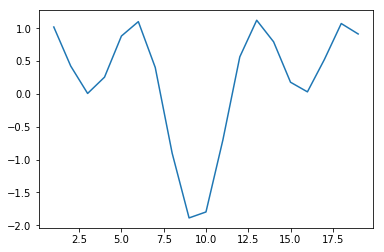

In [143]:
plt.plot(trainx,trainy)
plt.show()

Function to Normalize data

In [144]:
def norm(x):
    n=x-np.mean(x)
    n=n/np.std(x)
    return n

Below Function returns polynomial basis matrix for the given data x and polynomial degree n

In [145]:
def polybasis(x,n):
    p=[]
    for i in range(n):
        p.append(x**i)
    return np.asarray(p).reshape([len(x),n])

In [146]:
print(norm(x))
polybasis(norm(x),15).shape

[-1.64316767 -1.46059349 -1.2780193  -1.09544512 -0.91287093 -0.73029674
 -0.54772256 -0.36514837 -0.18257419  0.          0.18257419  0.36514837
  0.54772256  0.73029674  0.91287093  1.09544512  1.2780193   1.46059349
  1.64316767]


(19, 15)

In [147]:
def error(y,pred):
    m=(pred-y)**2
    return sum(m)/len(y)

In [170]:
def poly_regressorhelp(phi,y,l,n):
    I=np.eye(n)
    i=inv(l*I+np.dot(phi.T,phi))
    w=np.dot(i,np.dot(phi.T,y))
    return w

In [199]:
def poly_regressor(x,y,test,testl,n):
    phi=polybasis(norm(x),n)
    l=0
    w=poly_regressorhelp(phi,y,l,n)
    trainpred=np.dot(phi,w)
    testpred=np.dot(polybasis(norm(test),n),w)
    trainerror=error(y,trainpred)
    testerror=error(testl,testpred)
    print('test error:',testerror)
    print('train error:',trainerror)
    t = test
    a = testl
    b = testpred
    plt.plot(t, a,'go-', label='true label') # plotting t, a separately 
    plt.plot(t, b, 'ro-',label='predicted label')
    red_patch = mpatches.Patch(color='red', label='predicted label')
    red_patch = mpatches.Patch(color='green', label='true label')
    plt.show()
    if(testerror>2):
        print('Overfitting occured')
        l_testerr=[]
        l_trainerr=[]
        lam=[]
    l=500
    w=poly_regressorhelp(phi,y,l,n)
    trainpred=np.dot(phi,w)
    testpred=np.dot(polybasis(norm(test),n),w)
    trainerror=error(y,trainpred)
    testerror=error(testl,testpred)
    print('test error:',testerror)
    print('train error:',trainerror)
    t = test
    a = testl
    b = testpred
    plt.plot(t, a,'go-', label='true label') # plotting t, a separately 
    plt.plot(t, b, 'ro-',label='predicted label')
    red_patch = mpatches.Patch(color='red', label='predicted label')
    red_patch = mpatches.Patch(color='green', label='true label')
    plt.show()
    

        
        

test error: 2.59558950702
train error: 0.423901921374


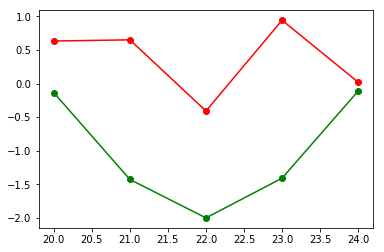

Overfitting occured
test error: 1.67257580664
train error: 0.765572320871


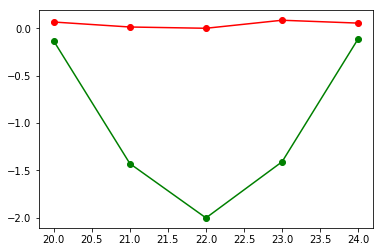

In [200]:
poly_regressor(trainx,trainy,testx,testy,3)

In [184]:
print(len(testl))

10


In [108]:
phi=polybasis(norm(x),15)
I=np.eye(15)
#print(I)
#q=np.dot(phi.transpose(),y)
#w=np.dot(inv(np.dot(phi.transpose(),phi)),q)


In [109]:
i=inv(100*I+np.dot(phi.T,phi))
print(i.shape)
w=np.dot(i,np.dot(phi.T,y))
print(w.shape)
print(phi.shape)

(15, 15)
(15,)
(19, 15)


In [110]:
pred=np.dot(phi,w)
print(pred-y)
m=(pred-y)**2
print(m)
sum(m)/19

[ -1.07510507e+00  -3.82717210e-01  -1.10802496e-01  -9.06588642e-02
  -9.16981805e-01  -1.01899984e+00  -8.85056210e-02   3.63978500e-01
   2.42153850e-01   1.78863817e+00   1.87873911e-01   6.96806535e-03
  -4.38019414e-02   2.97442677e-02  -1.96781313e-01  -1.64022959e-03
   1.53831005e-03  -4.12964731e-05   5.02450466e-03]
[  1.15585090e+00   1.46472463e-01   1.22771931e-02   8.21902965e-03
   8.40855630e-01   1.03836067e+00   7.83324495e-03   1.32480348e-01
   5.86384870e-02   3.19922652e+00   3.52966066e-02   4.85539347e-05
   1.91861007e-03   8.84721460e-04   3.87228850e-02   2.69035311e-06
   2.36639780e-06   1.70539869e-09   2.52456471e-05]


0.35142716676743496

In [138]:
test=np.arange(20,30)
pred=np.dot(polybasis(norm(test),15),w)
testl=[fun_y(val) for val in test]
print(error(testl,pred))
print(testl)
print(pred-testl)
m=(pred-testl)**2
print(m)
sum(m)/19

32.0967500859
[-0.13593904907597776, -1.4274250201959384, -1.9999510329453405, -1.408285195021826, -0.11239391066343796, 0.924880914512273, 1.0670863591552813, 0.5116456178177848, 0.028001489381303757, 0.18683752583568258]
[  0.08119951   1.3868133    2.0097302    1.6243651   -1.00572312
  -1.04020461   0.36940769   2.11317445 -17.2642988   -2.75836782]
[  6.59336030e-03   1.92325112e+00   4.03901547e+00   2.63856198e+00
   1.01147900e+00   1.08202563e+00   1.36462041e-01   4.46550624e+00
   2.98056013e+02   7.60859305e+00]


16.893026361021196

In [36]:
print(w.shape)

(10,)


In [11]:
#test=np.arange(20,30)
test=x

In [12]:
pred=np.dot(polybasis(test),w)
testy=[fun_y(val) for val in test]

In [27]:
err=np.sum(np.square(test-pred))/test.shape[0]
print(err)

41264769.6197
